# Introduction: "Home Credit Default Risk" Competition                   (By:- ckum)

https://www.kaggle.com/c/home-credit-default-risk


Now About the problem "The Home Credit default risk" machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

    Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
    
    Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)
 

# Data

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

    1. application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
    2. bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
    3. bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
    4. previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
    5. POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
    6. credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
    7. installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment

# Data Relationship

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

That's Awesome , so dear first tell me the problem 

__My system is unable to process this amount of data __

this is not a problem,Its a lame excuse coz the biggest file is of 700 MB , In a era where people are talking about data in TB you are fearing with mb's . 
Now encounter this problem I have few solution .


1 Convert the CSV file to SQL and then play .

2 Use different library like Blaze, Dask .

3 Use Stat basic rule and make small sample dataset . 

anyone will solve your problem . 






Now when size is no more problem , then the question is how to start and from where to start ?

__I think now we will take each dataset will try to reduce the number of column by checking the relationship with target and use few Algorithm like dimensionality reduction to reduce the volume and will make our final dataset and then our model will be ready__  







A quick approch , dear model building is a life time task , one model can make you or break you . Now before we start, first few thing should be very clear . 

1. Its a project so a project cant be for lifelong so first plan for time line and time distribution . (first step for planning)

2. Once your time line is ready then make your Main Hypothesis, that should be the path according to timeline .


Your approch is more rely on Algorithm   may I know why ?






__I am from non programming background , and my understanding is that with algrorithm you can make any type of model without doing the hardwork of Stats and other subjects . so I am more focus on algroithms and its hyper parameters__

good,  but try to  understand stat its not hardwork , its a framwork or its provide you the path . and if you follow the path at the end you may not get a good sucess but you will be in a position where you will able to give the real time problems that representing your failure . and that you will not achive with any other path.  

Now as you are in mood of learning algorithm lets make 1 or 2 model with the help of different algorithm . then tell me how you want to proceed. 

__First we make a model with application data___

ok , so no hypothises just plain vanilla model 

## 1. Application  DataSet

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# matplotlib and seaborn and other for plotting
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
%matplotlib
import missingno as msno

import warnings

warnings.filterwarnings("ignore")


Using matplotlib backend: Qt5Agg


In [2]:
#reading the file 
db = pd.read_csv("DATA/application_train.csv")

In [3]:
#database shape
db.shape

(307511, 122)

In [4]:
#database head
db.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


##  Exploratory Data Analysis (EDA) 

Is an open-ended process where we performe univariate & bivariate analysis to find out/ stablished the relationship between dependent & Independent variable .

In [5]:
# Number of each type of column
db.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
# creating function for Grouping the categorical & numerical features

def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)
  

In [7]:
type_features(db)


categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

In [8]:
# Number of unique classes in each object column
db.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

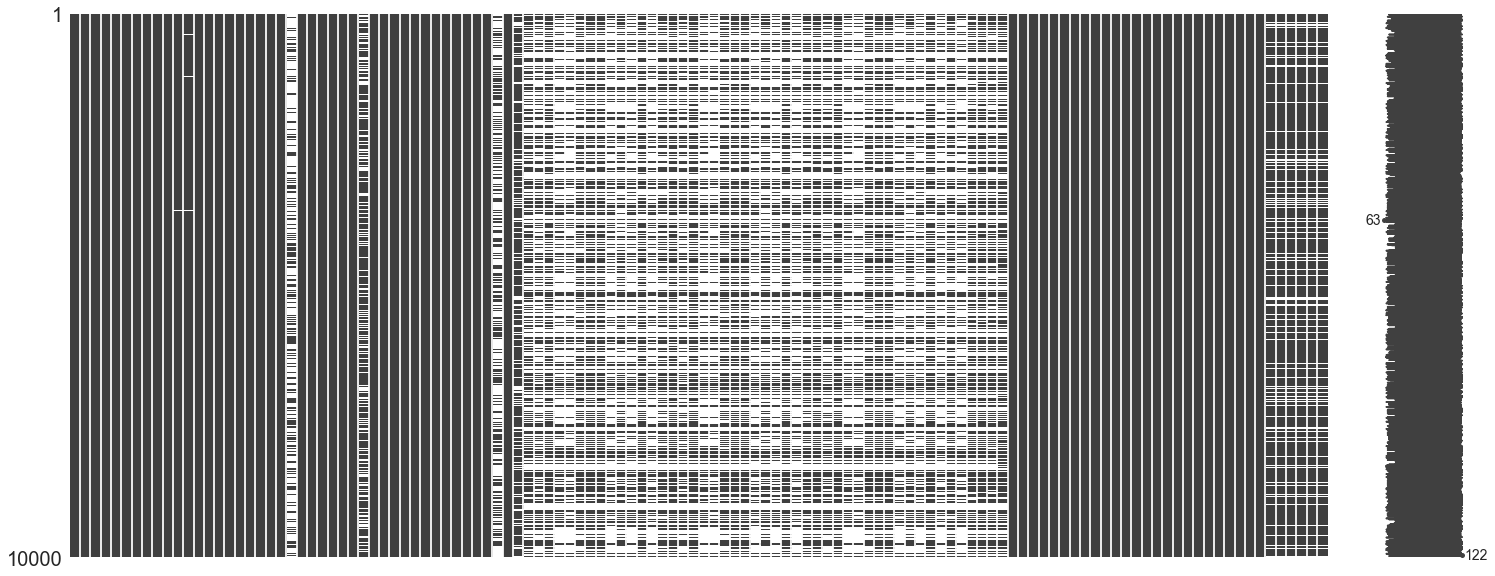

In [9]:
# Checking the missing value with missingno library
msno.matrix(db.sample(10000))

the light lines are the missing columns, now check count of missing in per 1,00,000 data point

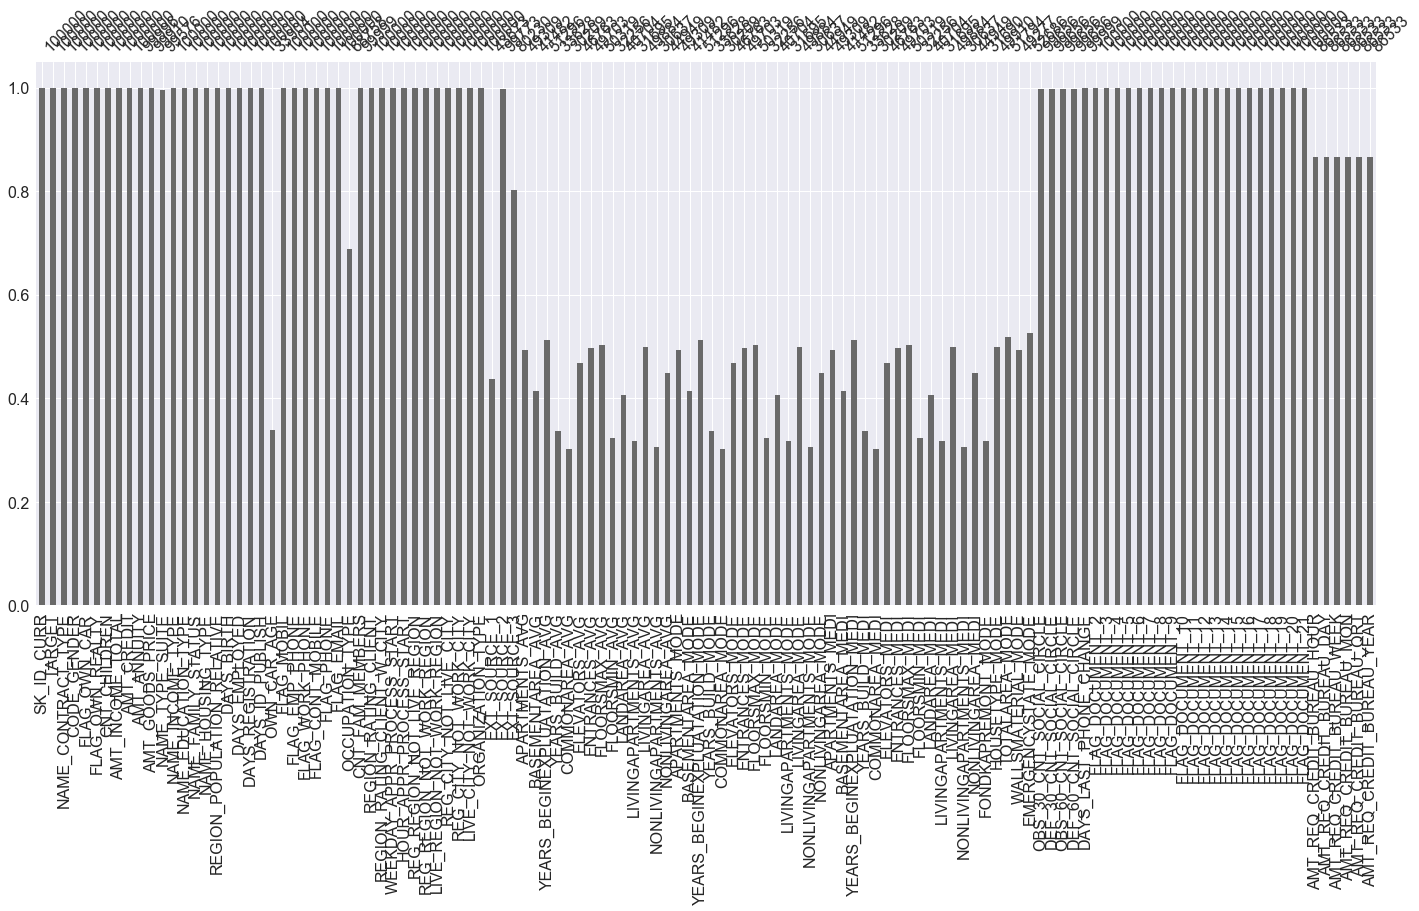

In [10]:
msno.bar(db.sample(100000))

- __Univariate analysis__

    1. Categorical features
    2. Numerical features

In [11]:
db.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


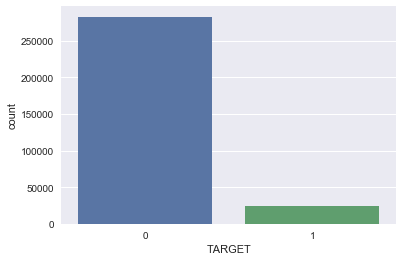

In [12]:
sn.countplot(db.TARGET)
plt.show()

So our target variable is in 9:1 distribution

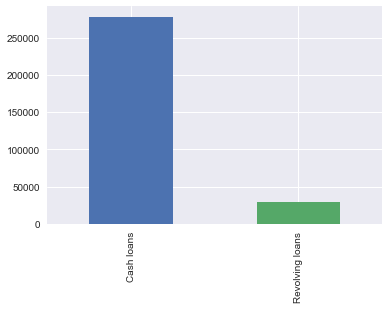

In [13]:
db['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar')

'NAME_CONTRACT_TYPE' also follow the same pattern 

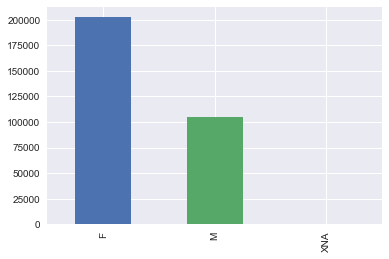

In [14]:
db['CODE_GENDER'].value_counts().plot(kind = 'bar')

gender distribution alone is not giving any importance we will study the relationship in byvariate analysis

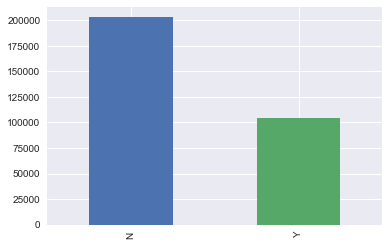

In [15]:
db['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar')

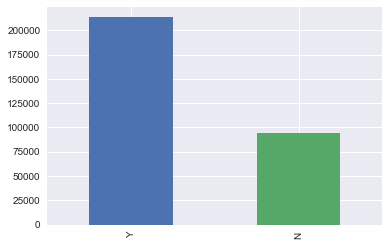

In [16]:
db['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')

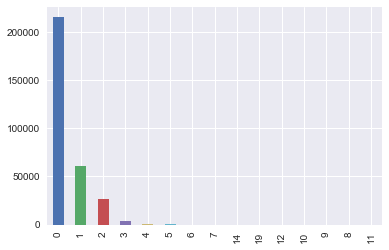

In [17]:
db['CNT_CHILDREN'].value_counts().plot(kind = 'bar')

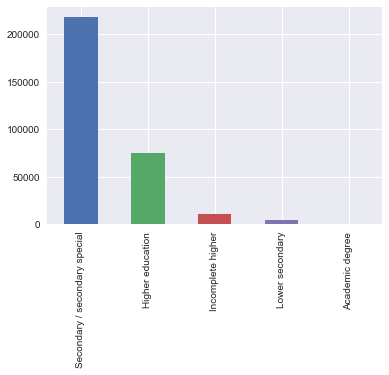

In [18]:
db['NAME_EDUCATION_TYPE'].value_counts().plot(kind = 'bar')

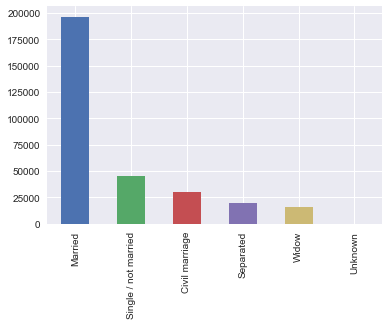

In [19]:
db['NAME_FAMILY_STATUS'].value_counts().plot(kind = 'bar')

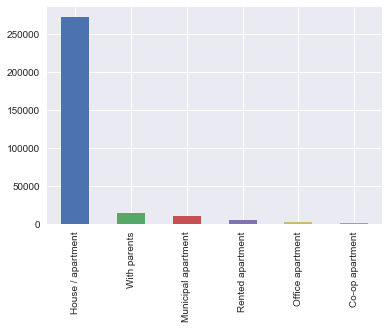

In [20]:
db['NAME_HOUSING_TYPE'].value_counts().plot(kind = 'bar')

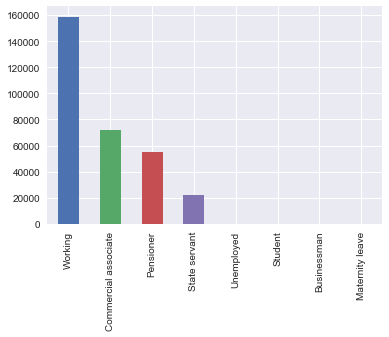

In [21]:
db['NAME_INCOME_TYPE'].value_counts().plot(kind = 'bar')

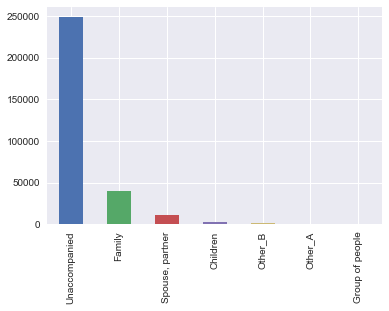

In [22]:
db['NAME_TYPE_SUITE'].value_counts().plot(kind = 'bar')

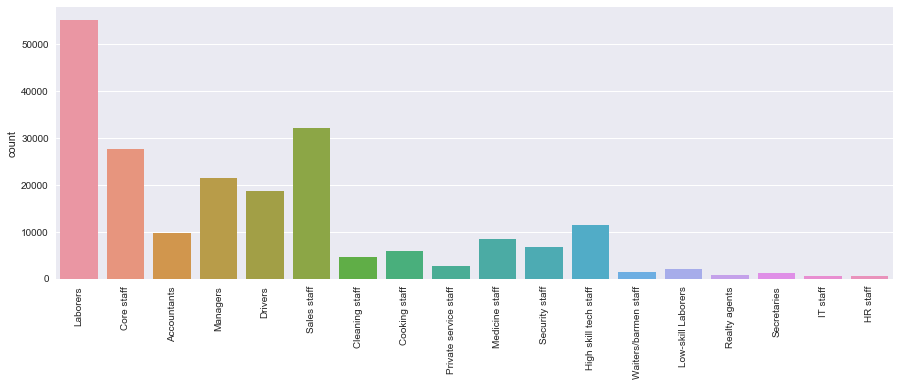

In [23]:
plt.figure(figsize=(15,5))
sn.countplot(db.OCCUPATION_TYPE.values,data=db)
plt.xticks(rotation=90)
plt.show()

In [24]:
# for ploting the distribution of numercial features

def plot_num(data, col, size=[8, 4], bins=50):
    
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sn.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()
    

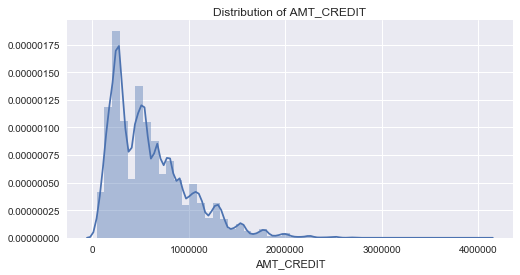

In [25]:
plot_num(db, 'AMT_CREDIT')

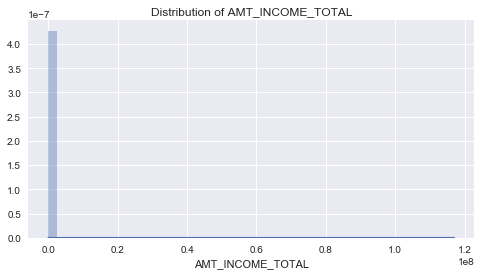

In [26]:
plot_num(db, 'AMT_INCOME_TOTAL')

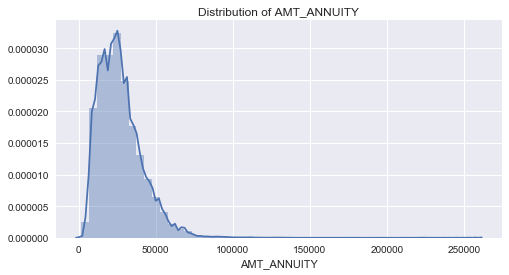

In [27]:
plot_num(db, 'AMT_ANNUITY')

- __Bivariate analysis__

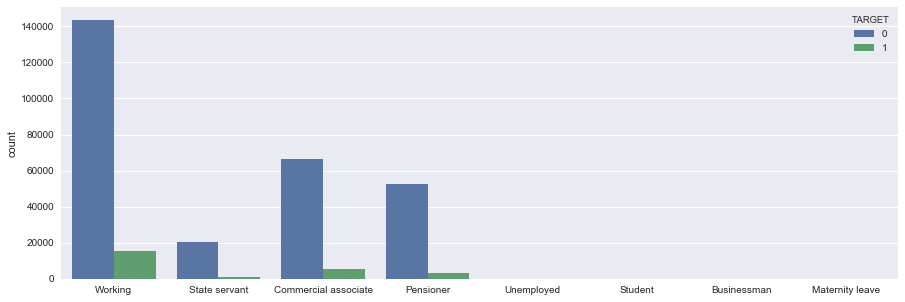

In [28]:
plt.figure(figsize=(15,5))
sn.countplot(db.NAME_INCOME_TYPE.values,data=db,hue=db.TARGET)
plt.show()

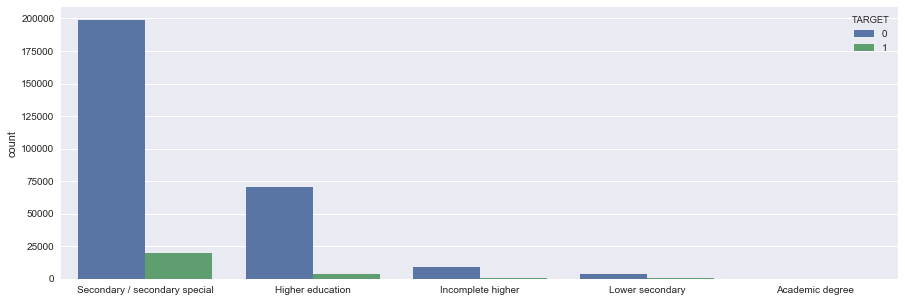

In [29]:
plt.figure(figsize=(15,5))
sn.countplot(db.NAME_EDUCATION_TYPE.values,data=db,hue=db.TARGET)
plt.show()

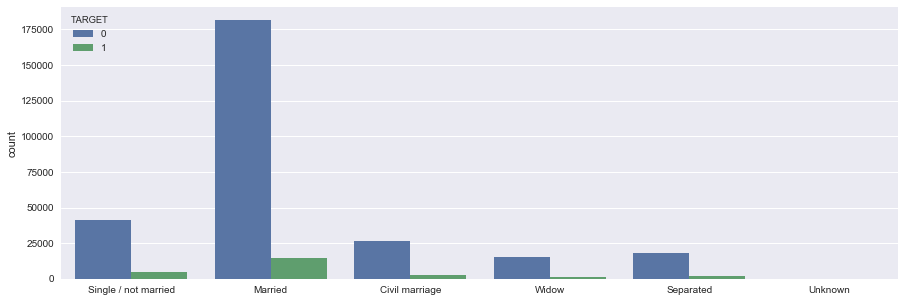

In [30]:
plt.figure(figsize=(15,5))
sn.countplot(db.NAME_FAMILY_STATUS.values,data=db,hue=db.TARGET)
plt.show()

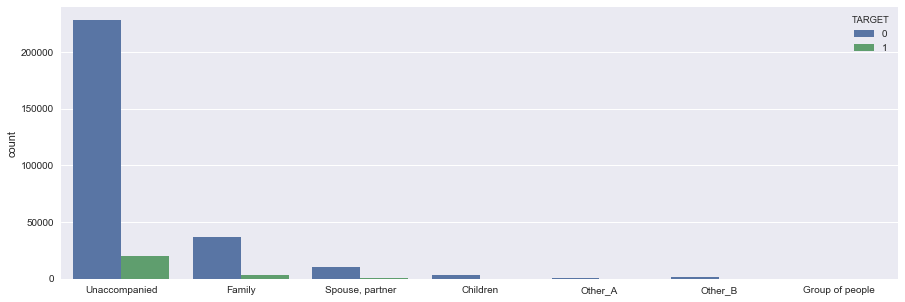

In [31]:
plt.figure(figsize=(15,5))
sn.countplot(db.NAME_TYPE_SUITE.values,data=db,hue=db.TARGET)
plt.show()

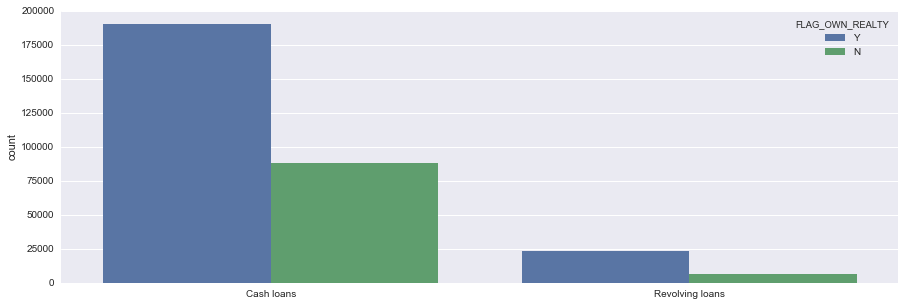

In [32]:
plt.figure(figsize=(15,5))
sn.countplot(db.NAME_CONTRACT_TYPE.values,data=db,hue=db.FLAG_OWN_REALTY)
plt.show()

- we can ignore the repetetative code by using function in python .

In [33]:
def plot_box(df,v1='',v2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[v1,v2]].groupby([v1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+v1)
    sn.countplot(v1,hue=v2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(v1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

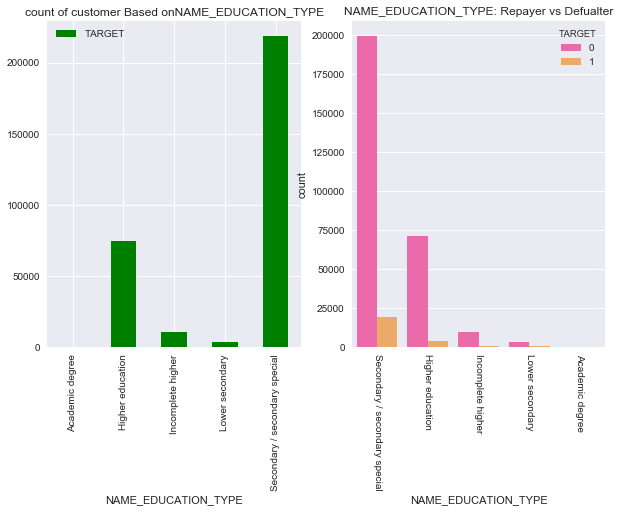

In [34]:
plot_box(db,'NAME_EDUCATION_TYPE','TARGET')

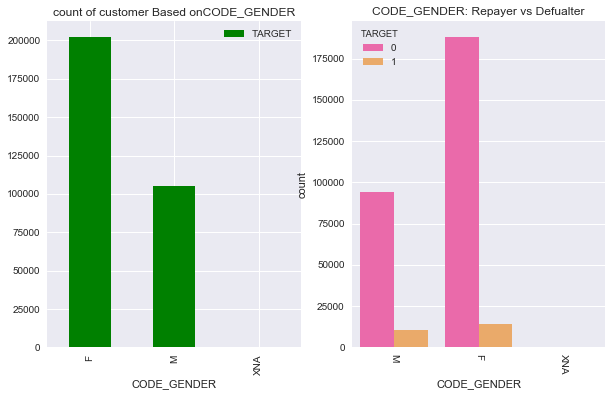

In [35]:
plot_box(db,'CODE_GENDER','TARGET')

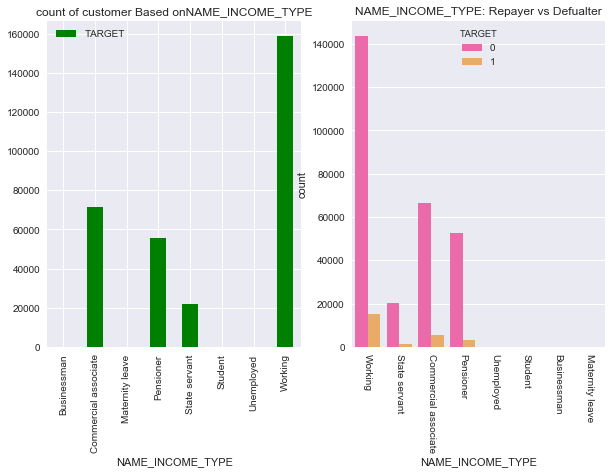

In [36]:
plot_box(db,'NAME_INCOME_TYPE','TARGET')

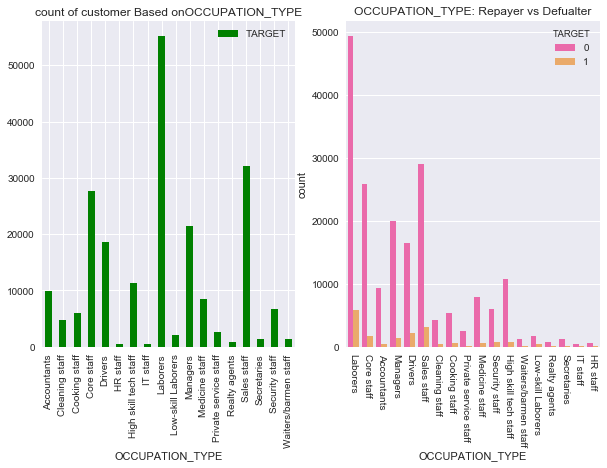

In [37]:
plot_box(db,'OCCUPATION_TYPE','TARGET')

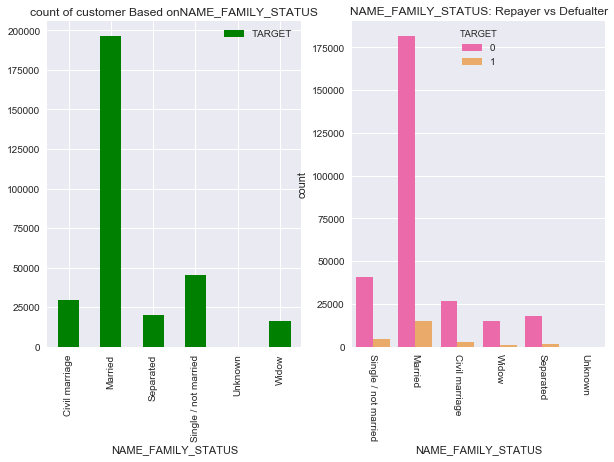

In [38]:
plot_box(db,'NAME_FAMILY_STATUS','TARGET')

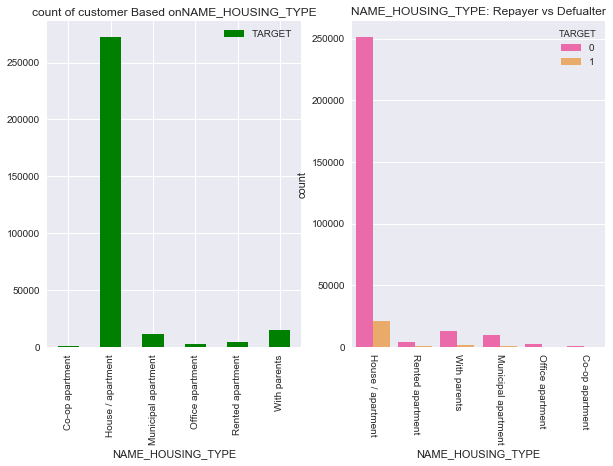

In [39]:
plot_box(db,'NAME_HOUSING_TYPE','TARGET')

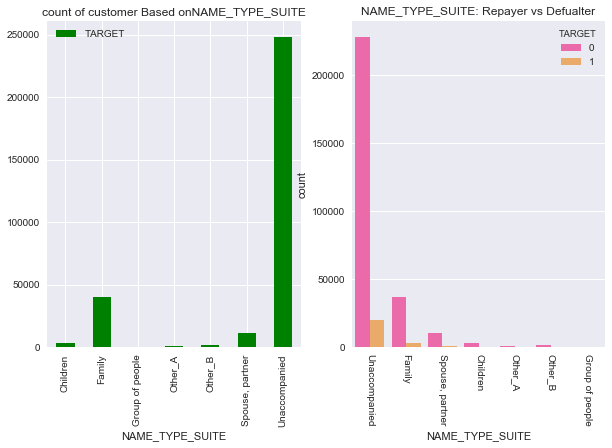

In [40]:
plot_box(db,'NAME_TYPE_SUITE','TARGET')

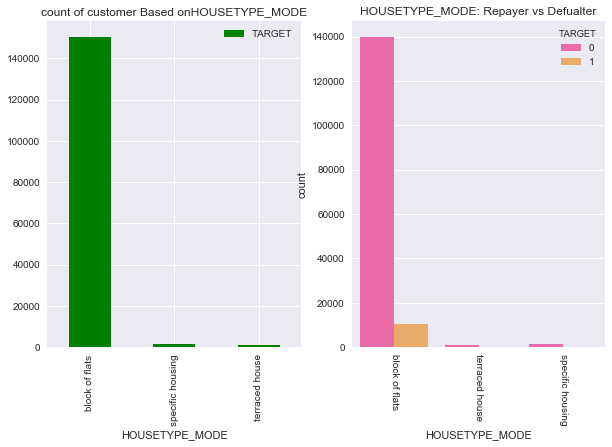

In [41]:
plot_box(db,'HOUSETYPE_MODE','TARGET')



In [42]:
# "For numerical feature we use Kernel Density Estimate Plots as we have 100+ numerical feature so we are making a function.


def plot_numerical_bylabel(data, col, size=[12, 6]):
    plt.figure(figsize=size)
    # Calculate the correlation coefficient between the new variable and the target
    corr = data['TARGET'].corr(data[col])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = data.ix[data['TARGET'] == 0, col].median()
    avg_not_repaid = data.ix[data['TARGET'] == 1, col].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sn.kdeplot(data.ix[data['TARGET'] == 0, col], label = 'TARGET == 0')
    sn.kdeplot(data.ix[data['TARGET'] == 1, col], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    



The correlation between EXT_SOURCE_1 and the TARGET is -0.1553


<Figure size 864x432 with 0 Axes>

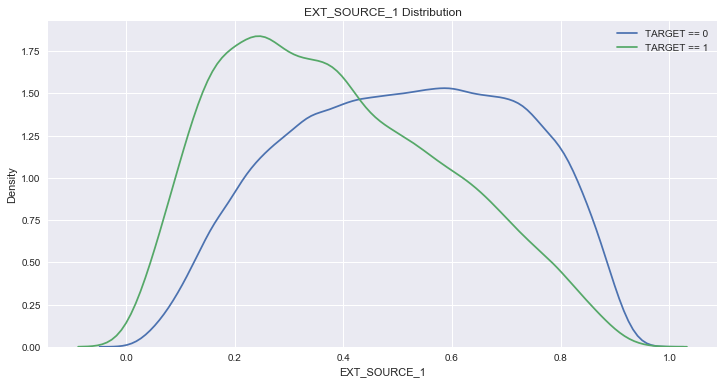

In [43]:
plot_numerical_bylabel(db, 'EXT_SOURCE_1')

The correlation between EXT_SOURCE_2 and the TARGET is -0.1605


<Figure size 864x432 with 0 Axes>

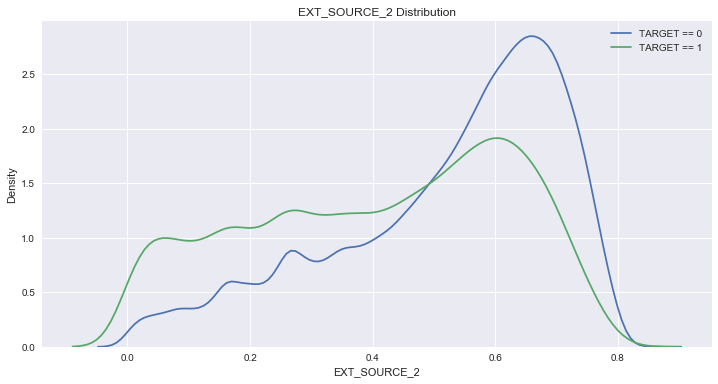

In [44]:
plot_numerical_bylabel(db, 'EXT_SOURCE_2')

The correlation between AMT_ANNUITY and the TARGET is -0.0128


<Figure size 864x432 with 0 Axes>

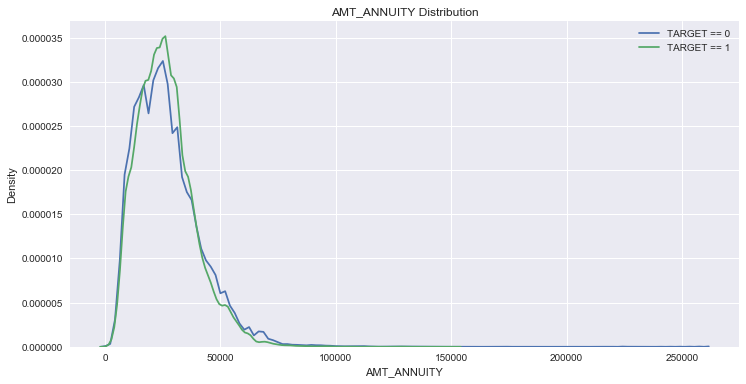

In [45]:
plot_numerical_bylabel(db, 'AMT_ANNUITY')

The correlation between DEF_60_CNT_SOCIAL_CIRCLE and the TARGET is 0.0313


<Figure size 864x432 with 0 Axes>

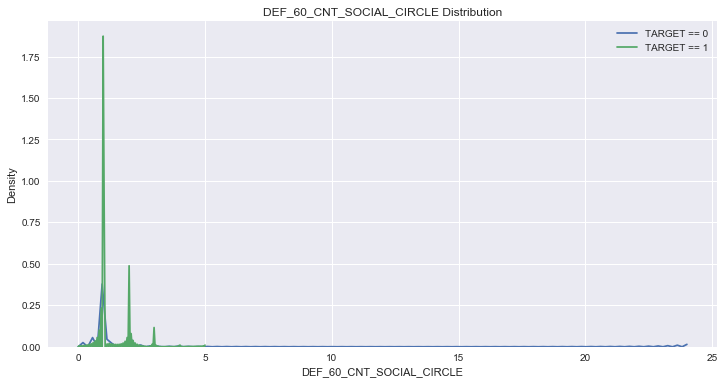

In [46]:
plot_numerical_bylabel(db, 'DEF_60_CNT_SOCIAL_CIRCLE')

The correlation between DEF_30_CNT_SOCIAL_CIRCLE and the TARGET is 0.0322


<Figure size 864x432 with 0 Axes>

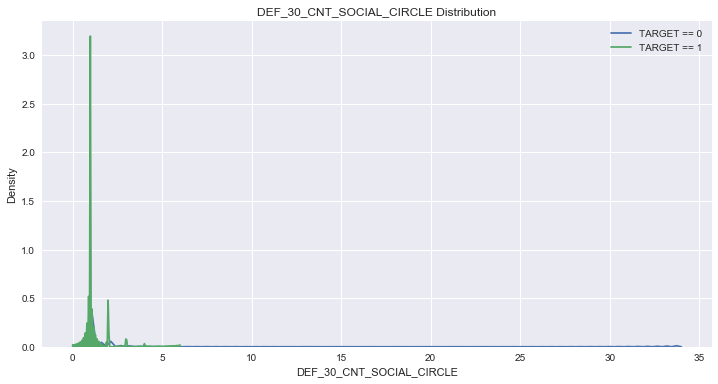

In [47]:
plot_numerical_bylabel(db, 'DEF_30_CNT_SOCIAL_CIRCLE')

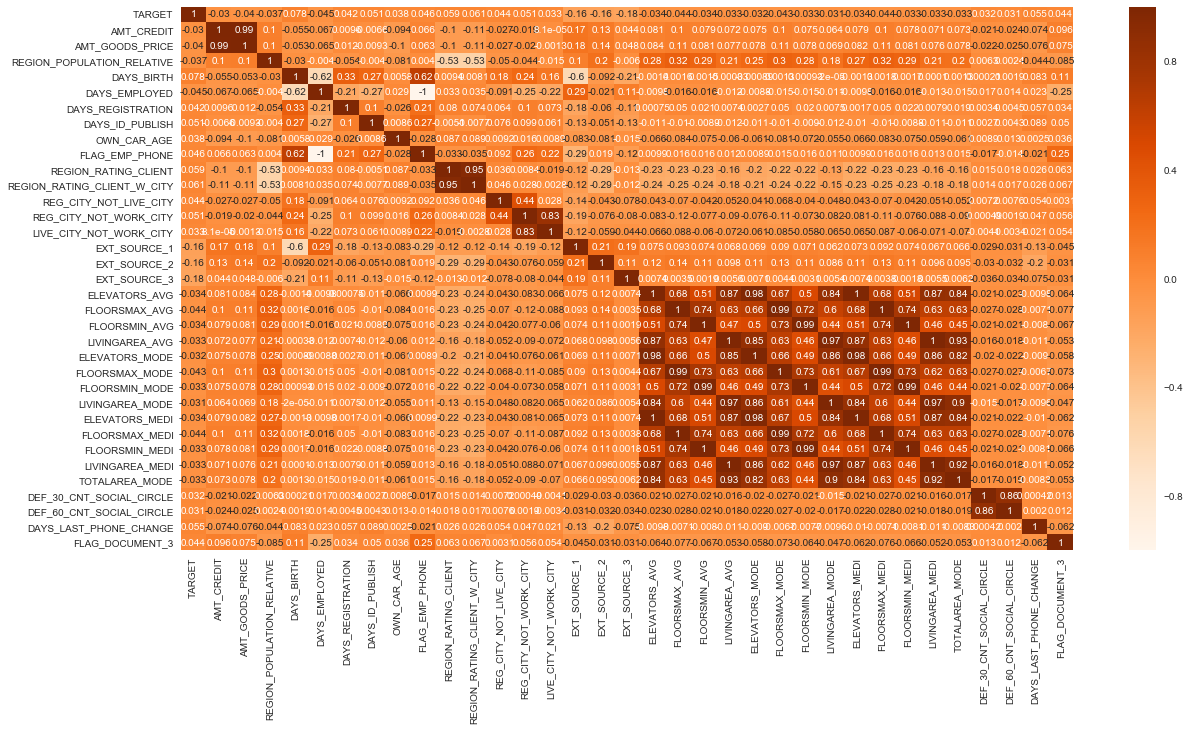

In [48]:
#checking the most correlated features

corrmat = db.corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sn.heatmap(db[top_corr_features].corr(),annot=True,cmap="Oranges")

__so with the process of EDA we have selected few variable to perform our first base model__

In [49]:
db_1 = db.loc[:,['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']]

In [50]:
db_1.shape

(307511, 11)

In [51]:
#for missing value we choose to drop the rows cantaining missing value
db_1.dropna(how='any', inplace=True)

In [52]:
# while droping we loos 1200 rows , which is a vey small in compare to the size of database
db_1.shape

(306200, 11)

In [53]:
db_1.isnull().sum()

SK_ID_CURR                  0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
CNT_FAM_MEMBERS             0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
TARGET                      0
dtype: int64

In [54]:
X = db_1.iloc[:,1:10]
Y = db_1.loc[:,['TARGET']]

In [55]:
# Importing Libaray for spliting the dataset and for scaling the variable in 1 parameter 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [56]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in db_1:
    if db_1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            db_1[col] = db_1.transform(db_1[col])
          
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=.2)

In [58]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit(X_test)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,confusion_matrix,accuracy_score,f1_score

In [60]:
RF = RandomForestClassifier(n_estimators=200,bootstrap=True,max_depth= 50,max_features= 5,min_samples_leaf= 5,
                          min_samples_split= 15,oob_score=True,verbose=2,random_state=52, n_jobs = -1)
RF.fit(X_train,Y_train.values.ravel())
scores = cross_val_score(RF, x_train, Y_train.values.ravel(), cv=3)

building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.3s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.6min finished


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.2s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min


building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200building tree 182 of 200

building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.9s finished


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.7s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200building tree 70 of 200

building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.9s finished


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.5s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200building tree 166 of 200

building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.7s finished


In [61]:
Y_pred = RF.predict(X_test)

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.6s finished


In [62]:
p_s = precision_score(Y_test,Y_pred)
r_s = recall_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
acc = accuracy_score(Y_test,Y_pred)

In [63]:
acc

0.917161985630307

In [64]:
p_s

0.46153846153846156

In [65]:
r_s

0.0011829652996845426

In [66]:
cm

array([[56161,     7],
       [ 5066,     6]], dtype=int64)

In [67]:
f1

0.002359882005899705

__Yup our first model is ready ___

Dear its was just a discription of Algo usage , it was not a MODEL . From where you have learn this model ? 

__I took refrences from Kernels made for public domain__

__Why any thing wronge with that ?__

not wronge , and I can't judge , but now you visited the site.Can you tell me the raw observation of yours about this problem ? 

__Problem is huge , so was the price money  ! its over now. The AUC score of the winner team of "6 team member" was "0.80570" with 499 entry. Their are many public domain kernels which are helpful and a discussion panel where we discuss every thing related to problem . So taking help from public domain is bad ?__

not bad, but what you are taking is matters. Like you said you are new to code, so coding may be a challenge for you. Then you can learn the coding style , github is also their to help . But apply your concept , like if I ask you that ,

## "How will you justify a correlation matrix presence in a classification problem ?

__Yaar , what is your problem, in almost every kernel releated to this problem "correlation matrix" is present and you are asking for justification , it means All are wrong ?__

No I am not telling you, that they are wronge , I am just asking you "__By which mean you came to a conclusion that you required a correlation Matrix  for a classical classification problem__ " .


Dont commite crime while learning , Preper your "Hypothesis" atlist to take a start .

__Hypothesis is ready "The problem statment :-"__






__Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.__

__Home Credit Group__

__Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.__

__While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.__

This is description dear not the hypothesis !.

Please read some reserech paper , in the mean time I will search for Job and will get some more Hypothesis from some good  Interviewer . life is all about learning .

Now lets discuss some other real time problem associated to this Question

__DATA__

As per 1st step of __EDA__ Python divided the column as per datavalue in three type 
    
    1. float64    65
    
    2. int64      41
    
    3. object     16


you have done all the calculation based on that , but we know that ,

    Our data value primarlly can be divided into two type 

        a)  Qualitative
    
        b)  Quantitative
    
Now after the distribution of data in these two type and then further 2-2 more type for both (check "__Data__" for details ). Then we will be in position to start our work , before that if you are taking mean , median , or mode for any mean or purpose to solve this problem ,then you are commiting a __Crime__ on the name of model building .Please don't do that and start working in good manner .
   

# Thank u  & will update  after distributing the data accordingly .